In [1]:
import cv2 as cv
import math
import time
import joblib
from serial.tools import list_ports
from pydobot.dobot import Dobot
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

for i in range(0,4):
    try:
        port = list_ports.comports()[i].device
        device = Dobot(port=port, verbose=False)
    except:
        pass
    else:
        break
device._set_queued_cmd_clear()
device.clear_all_alarms_state()


response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None
response is None


Message()

In [2]:
device.go_home()
device.rotate_to(90,0,0,40,wait=True)

In [3]:
cap = cv.VideoCapture(0)

In [4]:
%matplotlib inline

In [5]:
grab_z = -60
# adjust_coefficient_x = 1.095
# adjust_coefficient_y = 1.05
adjust_coefficient_x = 1.135
adjust_coefficient_y = 1.60

base_y = -206.70 - 15
base_x = 2
grab_angle = -90

# 仓库空间和放置高度
store_pos = {"l1":[True,0], "l2":[True,0],"l3":[True,0], "r1":[True,0], "r2":[True,0],"r3":[True,0]}
# print(store)
store_position = [None, -35, -5, 25, 50]
drop_position = [-38,-8,23,47,50.0]

In [6]:
drop_x = 38
drop_y = 167
def grab_process(position):
    
    x ,i = position
    if x == 'l':
        x = -drop_x
    else:
        x = drop_x
    device.move_to(x, drop_y, drop_position[i], 0,True)
    device.move_to(x, drop_y, drop_position[i-1], 0, True)
    time.sleep(0.5)
    device.suck(True)
    time.sleep(1)
    device.move_to(x, drop_y, 45, 0,True)
    device.rotate_to(90.0, 0.0, 0.0, -90.0, True)

def drop():
    device.rotate_to(90.0, 0.0, 0.0, -90.0, True)
    device.rotate_to(-90.0, 50.0, 0.0, 0.0, True)
    time.sleep(0.5)
    device.suck(False)
    device.rotate_to(90.0, 0.0, 0.0, -90.0, True)
    
def drop_by_name(name):
    device.rotate_to(90.0, 0.0, 0.0, -90.0, True)
    for i in range(3,0,-1):
        # store = joblib.load('./depository/store.pkl')
        if not store_pos['r'+ str(i)][0] and (store_pos['r'+ str(i)][1]==name) :
            # store = joblib.load('./depository/store.pkl')
            #如果上面有盒子
            if not store_pos['r'+ str(i+1)][0]:
                pre_grab_process(['r',i])#搬開上面的盒子
            else:
                grab_process(['r',i])
                drop()
                store_pos['r'+ str(i)][0]=True
            print("move job done with "+ str(store))
            print("#############################################")
        # store = joblib.load('./depository/store.pkl')
        if not store_pos['l'+ str(i)][0] and (store_pos['l'+ str(i)][1]==name or name=='test'):
            # store = joblib.load('./depository/store.pkl')
            if not store_pos['l'+ str(i+1)][0]:#如果上面有盒子
                pre_grab_process(['l',i])#搬開上面的盒子
            else:
                grab_process(['l',i])
                drop()
                store_pos['l'+ str(i)][0]=True
            print("move job done with "+ str(store))
            print("#############################################")
    device.rotate_to(90.0, 0.0, 0.0, -90.0, True)
def pre_grab_process(position):
    # store = joblib.load('./depository/store.pkl')
    towards ,i = position
    if towards =='l':
        x = -drop_x
        reverse_towards = 'r'
    else:
        x = drop_x
        reverse_towards = 'l'
    ##################################################################
    #转移过程
    ##################################################################
    device.move_to(x, drop_y, drop_position[i+1], 0,True)
    device.move_to(x, drop_y, drop_position[i], 0, True)
    time.sleep(0.5)
    device.suck(True)
    time.sleep(1)
    device.move_to(x, drop_y, 30, 0,True)
    device.move_to(-x, drop_y, 30, 0,True)
    device.move_to(-x, drop_y, -5, 0,True)
    time.sleep(0.5)
    device.suck(False)
    device.move_to(x, drop_y, 30, 0,True)
    ##################################################################
    #抓取过程
    ##################################################################
    grab_process(position)
    drop()
    ##################################################################
    #返回过程
    ##################################################################

    for i in range(1,4):
        if store_pos[reverse_towards+str(i)][0]:
            device.move_to(-x, drop_y, 0,True)
            time.sleep(0.5)
            device.move_to(-x, drop_y, drop_position[i-1], 0, True)
            time.sleep(0.5)
            device.suck(True)
            time.sleep(1)
            device.move_to(-x, drop_y, 30, 0,True)
            device.move_to(x, drop_y, 30, 0,True)
            device.move_to(x, drop_y, -35, 0,True)
            time.sleep(0.5)
            device.suck(False)
            #清理存储顺序
            store_pos[towards+str(1)][1] = store_pos[towards+str(2)][1]
            store_pos[towards+str(1)][0] = False
            store_pos[towards+str(2)][0] = True
            break
    # store['r'+ str(i)][1]=store['r'+ str(i+1)][1]

In [11]:
# device.rotate_to(-90.0, 0.0, 0.0, 0, True)
def locate(cap,plt_show=False):
    for i in range(0,30):
        _, origin_img = cap.read()
    #origin_img = cv.imread("./test2.jpg")
    blur_img = cv.blur(origin_img, (4, 4))
    # 直方图均值化
#     lab = cv.cvtColor(blur_img, cv.COLOR_BGR2LAB)
#     lab_planes = cv.split(lab)
#     clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
#     lab_planes[0] = clahe.apply(lab_planes[0])
#     lab = cv.merge(lab_planes)
#     clahe_img = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
    # hsv的下红色范围
    hsv = cv.cvtColor(blur_img, cv.COLOR_BGR2HSV)
    plt.figure(figsize=(10,5))
    ###############################################
    lower_blue = np.array([101, 79, 75])
    upper_blue = np.array([139, 255, 255])
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
    
    
    lower_green = np.array([49, 78, 88])
    upper_green = np.array([92,255, 255])
    mask_green = cv.inRange(hsv, lower_green, upper_green)
    
    
    lower_red = np.array([0, 176, 40])
    upper_red = np.array([69, 255, 255])
    mask_red = cv.inRange(hsv, lower_red, upper_red)
    
    ################################################
    all_box = cv.bitwise_or(mask_blue,mask_green)
    all_box = cv.bitwise_or(all_box,mask_red)
    contours = list()
    img, red_contours, _ = cv.findContours(
            mask_red, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    img, blue_contours, _ = cv.findContours(
            mask_blue, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    img, green_contours, _ = cv.findContours(
            mask_green, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contours+=red_contours
    contours+=blue_contours
    contours+=green_contours
    
    cv.imwrite("test_bwimg.jpg",all_box)
    rects = list()
    test_img=origin_img.copy()
    
    boxes = list()
    for c in red_contours:
        rect = cv.minAreaRect(c)
        width, height = rect[1][0], rect[1][1]
        if width*height >12000:
            rects.append([rect,1])
            box = cv.boxPoints(rect)
            box = np.int0(box)
            boxes.append(box)
    for c in blue_contours:
        rect = cv.minAreaRect(c)
        width, height = rect[1][0], rect[1][1]
        if width*height >12000:
            rects.append([rect,2])
            box = cv.boxPoints(rect)
            box = np.int0(box)
            boxes.append(box)
    for c in green_contours:
        rect = cv.minAreaRect(c)
        width, height = rect[1][0], rect[1][1]
        if width*height >12000:
            rects.append([rect,3])
            box = cv.boxPoints(rect)
            box = np.int0(box)
            boxes.append(box)
    for box in boxes:
        cv.drawContours(test_img, [box], 0, (0, 0, 255), 2)
    
    
    results = list()
    y, x = origin_img.shape[:2]
    if (plt_show):
        plt.figure(figsize=(16,9))
        plt.subplot(2,3,1), plt.axis('off')
        plt.imshow(mask_blue)
        plt.subplot(2,3,2), plt.axis('off')
        plt.imshow(mask_green)
        plt.subplot(2,3,3), plt.axis('off')
        plt.imshow(mask_red)
        plt.subplot(2,3,4), plt.axis('off')
        plt.imshow(cv.cvtColor(origin_img, cv.COLOR_BGR2RGB))
        plt.subplot(2,3,5), plt.axis('off')
        plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
        plt.subplot(2,3,6),plt.axis('off')
        plt.imshow(all_box)
        plt.show()
#     cv.imshow("test",test_img)
    for item in rects:
        rec,color = item[0],item[1]
        position = rec[0]
        relative_y = (position[1]-y/2)/y*200
        relative_x = -(position[0]-x/2)/x*200
        results.append([relative_x, relative_y,rec[2],color])


    return results

def store(color):
    # device.rotate_to(90.0, 0.0, 0.0, -90, True)  # 90是放置方向,r=相反

    for i in range(1, 3):
        if store_pos['l' + str(i)][0]:
            device.rotate_to(110.0, 0.0, 0.0, -90, True)
#             device.move_to(-68, 167, store_position[i+1], 0)
            device.move_to(-38, 167, store_position[i], 0)
            device.suck(False)
            time.sleep(2)
            device.move_to(-38, 167, store_position[i+1], 0)
            store_pos['l' + str(i)][0] = False
            store_pos['l'+str(i)][1]=color
            print("store to l"+str(i))
            break
        if store_pos['r' + str(i)][0]:
            device.rotate_to(70.0, 0.0, 0.0, -90, True)
#             device.move_to(68, 167, store_position[i+1], 0)
            device.move_to(38, 167, store_position[i], 0)
            device.suck(False)
            time.sleep(2)
            device.move_to(38, 167, store_position[i+1], 0)
            store_pos['r' + str(i)][0]= False
            store_pos['r'+str(i)][1]=color
            print("store to r"+str(i))
            break
    
    print("--------------grabed-----------------")
    
    device.rotate_to( 90.0, 0.0, 0.0, 0.0, True)

<Figure size 720x360 with 0 Axes>

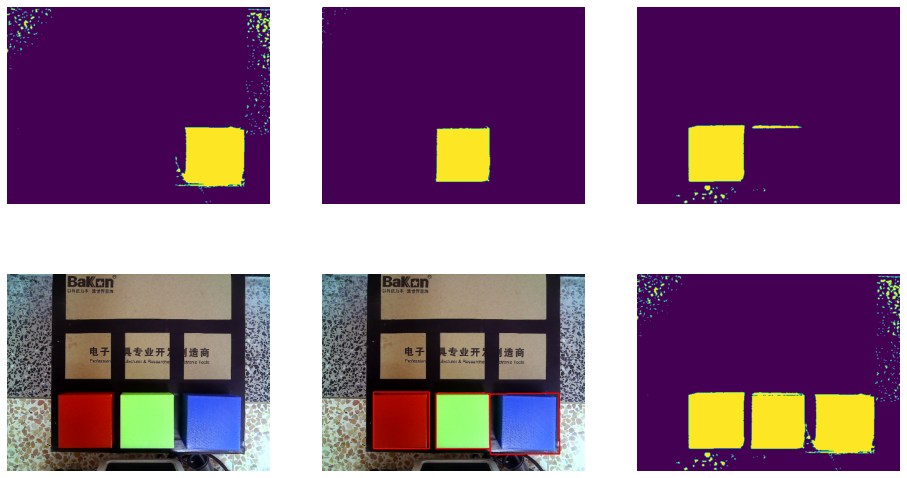

In [15]:
store_pos = {"l1":[True,0], "l2":[True,0],"l3":[True,0], "r1":[True,0], "r2":[True,0],"r3":[True,0]}
device.rotate_to(grab_angle, 0.0,
                 0.0, 0, True)

results = locate(cap,True)  # 拍照，寻找标签

In [9]:
print(store_pos)

{'l1': [True, 0], 'l2': [True, 0], 'l3': [True, 0], 'r1': [True, 0], 'r2': [True, 0], 'r3': [True, 0]}


In [10]:
for item in results:  # 对于每一个标签
    result, color = item[0:3],item[3]
    print("========================================================")
    print("Test of "+str(grab_angle)+" in simple "+str(i))
    device.rotate_to(-90, 0.0, 0.0, 0, True)  # 初始位置
    
    # print(str(i)+" r_angle "+str(angle))
    # print("position="+str(position))
    x, y = result[0:2]
    angle = result[2]
    grab_x = x
    grab_y = y

    grab_x = grab_x*adjust_coefficient_x + base_x  # 加权
    grab_y = grab_y*adjust_coefficient_y + base_y
    # ---------注意，base值不需要加权，因为已经在笛卡尔坐标系内了

    # 调整摄像头与吸盘相对距离用角度值
    camera_degree = abs(math.degrees(math.atan(grab_y/grab_x)))
    if grab_x < 0:
        grab_position_adjust_x = -math.cos(math.radians(camera_degree))*67
    else:
        grab_position_adjust_x = math.cos(math.radians(camera_degree))*67
    grab_position_adjust_y = -math.sin(math.radians(camera_degree))*67

    print("angle="+str(camera_degree))
    print("grabx= "+str(grab_x)+" graby="+ str(grab_y))
    print("true_grabx= "+str(grab_x+grab_position_adjust_x)+" true_graby="+ str(grab_y+grab_position_adjust_y))
    print("true_distance= "+str(math.sqrt( (grab_x+grab_position_adjust_x)**2 + (grab_y+grab_position_adjust_y)**2)))
    # 最大角度
    if grab_y < 0 and grab_x < 0 and abs(camera_degree) < 55:
        grab_y = -200
        grab_x = 0
        print("Out of angle")
        # out = True
    # 最大距离与最小距离
    elif (grab_x+grab_position_adjust_x)**2 + (grab_y+grab_position_adjust_y)**2 > 314**2 :
            # (grab_x)**2 + (grab_y)**2 < 160**2:
        # os.system("rosrun dashgo_tools move.py -0.02")
        print("Out of max range by "+str(grab_x)+' '+str(grab_y))
        grab_y = -200
        grab_x = 0
        
#     elif (grab_x)**2 + (grab_y)**2 <160**2:
# #         os.system("rosrun dashgo_tools move.py 0.04")
#         print("Out of min range by " +str(grab_x)+' '+str(grab_y))
#         grab_y = -200
#         grab_x = 0
        
        # out = True
    else:
        # print("grabx,graby = "+str(grab_x)+str(grab_y))
        # print(grab_x,grab_y)
#         if angle > 45:  # 因为没有必要保证标签水平，因此尽量减小旋转的角度
#             angle = angle - 90
        # (x, y, z, r,  j1, j2, j3, j4) = device.pose()
        # print("-grab_angle+angle="+str(grab_angle+angle))
        # print(device.pose()[:3])
        # true_result = "test"
        # ----------------------------------------
        # 抓取部分
#         device.move_to(grab_x+grab_position_adjust_x, grab_y +
#                     grab_position_adjust_y, camera_z, grab_angle+angle, wait=True)
#         device.move_to(grab_x+grab_position_adjust_x+2, grab_y +
#                     grab_position_adjust_y-9, grab_z, grab_angle+angle, wait=True)#原
        device.move_to(grab_x+grab_position_adjust_x+2, grab_y +
                    grab_position_adjust_y-9, grab_z, grab_angle+angle, wait=True)
        device.suck(True)
        time.sleep(0.5)
        # (x, y, z, r, j1, j2, j3, j4) = device.pose()
#         device.move_to(grab_x+grab_position_adjust_x, grab_y +
#                     grab_position_adjust_y, camera_z, grab_angle+angle, True)
        # -----------------------------------------
        device.rotate_to(grab_angle, 0.0, 0.0, 0.0, True)
        store(color)
        # device.rotate_to(grab_angle, 0.0, 0.0, 0.0, True)
        device.suck(False)

Test of -90 in simple 3
angle=74.52793277069857
grabx= -44.74339189529419 graby=-161.6454345703125
true_grabx= -62.61688517138367 true_graby=-226.21739627281602
true_distance= 234.7236346962498
store to l1
--------------grabed-----------------
Test of -90 in simple 3
angle=71.79275393261746
grabx= 47.6490216255188 graby=-144.86357421875
true_grabx= 68.583510432897 true_graby=-208.50905464252992
true_distance= 219.49880129791327
store to r1
--------------grabed-----------------
Test of -90 in simple 3
angle=86.9184574403615
grabx= -7.553994035720825 graby=-140.31757405598955
true_grabx= -11.155722313884851 true_graby=-207.2206947112346
true_distance= 207.5207615082192
store to l2
--------------grabed-----------------
Test of -90 in simple 3
angle=66.59836366576948
grabx= -61.5717161178589 graby=-142.27269287109374
true_grabx= -88.18238088570382 true_graby=-203.76149283184577
true_distance= 222.02449923315598
store to r2
--------------grabed-----------------


In [12]:
device.suck(False)

In [13]:
drop_by_name(1)

move job done with <function store at 0x7f3f97992a70>
#############################################


In [14]:
drop_by_name(2)

move job done with <function store at 0x7f3f97992a70>
#############################################


In [15]:
drop_by_name(3)

move job done with <function store at 0x7f3f97992a70>
#############################################


In [11]:
device.suck(True)